In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Importationdu jeu de données
Nous allons travailler avec un jeu de données qui correspond au nombre de passagers par jour enregister par une compagni aérienne de 1949 à 1960.


In [114]:
data= pd.read_csv("airline_passengers.csv", index_col='Month',parse_dates=True)
data.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### visualisation  de la série

<AxesSubplot:xlabel='Month'>

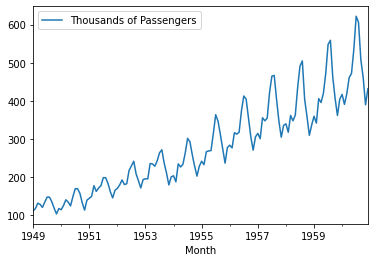

In [115]:
data.plot()

### convertion de la serie en stationnaire

In [116]:
data_diff= data.diff(periods=1)
data_diff= data_diff[1:]

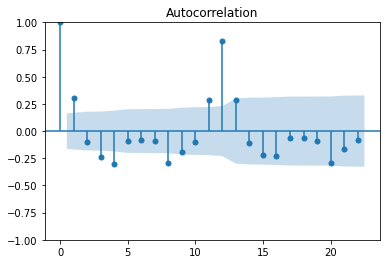

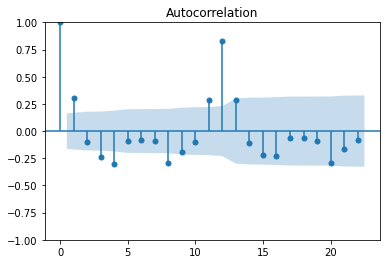

In [117]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)

la série est maintenant satationnaire

###  divisioon de la série
ici on va diviser la série en deux partie(70 et 30%) l'un pour l'entrainement et l'autre pour le teste

In [118]:
x=data.values

train = x[0:100] #100 données comme entrainement 
test = x[100:] # 44 données comme teste
predictions = []

# I- le modèle ARMA

## A- AR

### 1- creation du modèle Ar

In [126]:
from statsmodels.tsa.ar_model import AutoReg
model_ar =AutoReg(train,44, old_names=False)
model_ar_fit = model_ar.fit()

### 2- on éffectue la prédiction

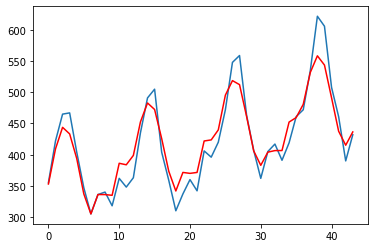

In [139]:
predictions1 = model_ar_fit.predict(start=101,end=144)
plt.plot(test)
plt.plot(predictions, color="red")

### 3- Erreur moyenne quadratique

In [140]:
mean_squared_error(test,predictions1)

4555.711764868915

### B- MA

### 1- creation du modèle MA

In [121]:
from statsmodels.tsa.
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
# model_ar =AutoReg(train,44, old_names=False)
model_am= MA(train)
model_am_fit = model_am.fit()

SyntaxError: invalid syntax (Temp/ipykernel_9552/3916796706.py, line 1)

# II- le modème ARIMA 

### 1- creation du modèle 

In [122]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train , order=(44,1,0))
model_arima_fit = model_arima.fit()

### 2- on éffectue la prédiction

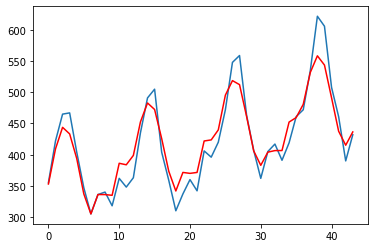

In [137]:
predictions2 = model_arima_fit.forecast(steps=44)
plt.plot(test)
plt.plot(predictions, color="red")

### 3- Erreur moyenne quadratique

In [138]:
mean_squared_error(test,predictions2)

614.8823148614172

# III- le modème SARIMA 

### 1- creation du modèle 

In [133]:
import statsmodels.api as sm
model_sarima = sm.tsa.statespace.SARIMAX(train, order=(44,1,0))
model_sarima_fit = model_sarima.fit(disp=False)

### 2- on éffectue la prédiction

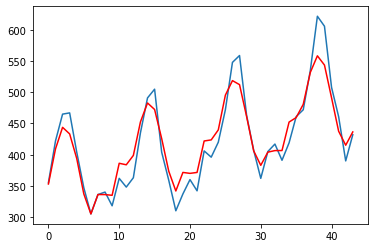

In [135]:
predictions3 = model_sarima_fit.forecast(steps=44)
plt.plot(test)
plt.plot(predictions, color="red")

### 3- Erreur moyenne quadratique

In [136]:
mean_squared_error(test,predictions3)

614.8823148614172